# Libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from FeedForwardNN import FFNN
from sklearn.metrics import accuracy_score, log_loss
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

# Load Data

In [32]:
# Load the breast cancer dataset from sklearn's datasets
data = datasets.load_breast_cancer()
X, y = data.data, data.target  # X is the feature set, y is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Here, we're using 20% of the data for testing and the rest for training.
# Setting random_state ensures we can reproduce the same split if we run the code again.

# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()  # Create a scaler object to standardize the data
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler
# Standardization helps the model converge faster and perform better, especially with gradient-based algorithms.



# Preprocessing the Breast Cancer Dataset for Model Training and Evaluation


In [33]:
# Defining the network structure
layers = [X_train_scaled.shape[1], 10, 1]  # Input layer size, one hidden layer with 10 nodes, and an output layer

# Initializing the model with sigmoid activation in hidden layers and momentum for binary classification
model = FFNN(layers=layers, learning_rate=0.03, activation='sigmoid', rho=0.6, lmbda=0.6, task_type='binary_classification')

# Training the model on the training data
model.fit(X_train_scaled, y_train, epochs=100, batch_size=10)  # Train for 100 epochs with a batch size of 10

# Evaluating accuracy on training data
train_accuracy = model.accuracy(X_train_scaled, y_train)  # Calculate accuracy on training set
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")  # Print training accuracy as a percentage

# Evaluating accuracy on test data 
test_accuracy = model.accuracy(X_test_scaled, y_test)  # Calculate accuracy on test set
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")  # Print test accuracy as a percentage



Epoch 0, Loss: 1.1661, Train Acc: 0.8923
Epoch 10, Loss: 0.9949, Train Acc: 0.7934
Epoch 20, Loss: 0.9928, Train Acc: 0.6703
Epoch 30, Loss: 0.9831, Train Acc: 0.6879
Epoch 40, Loss: 1.0012, Train Acc: 0.8220
Epoch 50, Loss: 0.9656, Train Acc: 0.7934
Epoch 60, Loss: 0.9913, Train Acc: 0.8176
Epoch 70, Loss: 0.9924, Train Acc: 0.7077
Epoch 80, Loss: 0.9845, Train Acc: 0.7011
Epoch 90, Loss: 0.9802, Train Acc: 0.6747
Training Accuracy: 69.45%
Testing Accuracy: 71.93%


# Training and Evaluating the FFNN Model with Loss and Accuracy Visualization


Epoch 0, Loss: 0.4950, Train Acc: 0.9363
Epoch 0, Loss: 0.4950, Train Acc: 0.9363, Val Acc: 0.9561, Val Loss: 0.4660
Epoch 10, Loss: 0.3258, Train Acc: 0.9824
Epoch 10, Loss: 0.3258, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.3201
Epoch 20, Loss: 0.2905, Train Acc: 0.9824
Epoch 20, Loss: 0.2905, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.2857
Epoch 30, Loss: 0.2762, Train Acc: 0.9824
Epoch 30, Loss: 0.2762, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.2729
Epoch 40, Loss: 0.2715, Train Acc: 0.9824
Epoch 40, Loss: 0.2715, Train Acc: 0.9824, Val Acc: 0.9912, Val Loss: 0.2685
Epoch 50, Loss: 0.2693, Train Acc: 0.9824
Epoch 50, Loss: 0.2693, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.2657
Epoch 60, Loss: 0.2688, Train Acc: 0.9824
Epoch 60, Loss: 0.2688, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.2656
Epoch 70, Loss: 0.2687, Train Acc: 0.9824
Epoch 70, Loss: 0.2687, Train Acc: 0.9824, Val Acc: 0.9825, Val Loss: 0.2664
Epoch 80, Loss: 0.2686, Train Acc: 0.9824
Epoch 80

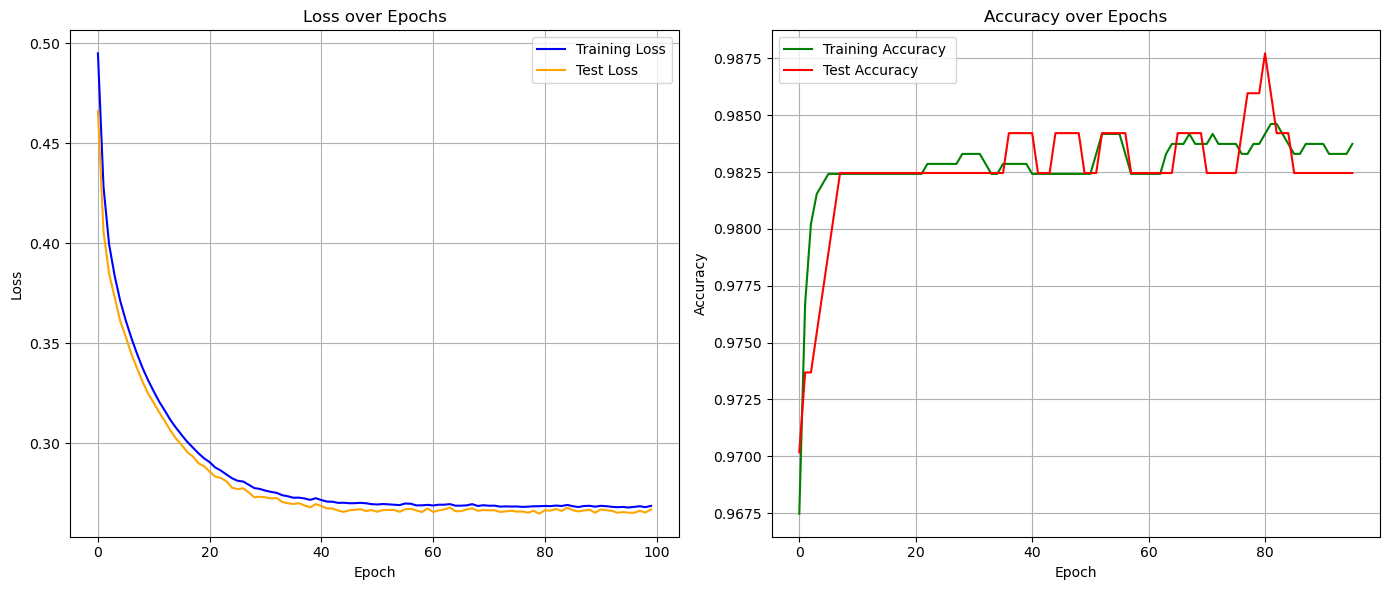

In [67]:
# Storage for training and Test losses and accuracies across epochs
train_losses = []  # List to store training losses
train_accuracies = []  # List to store training accuracies
val_losses = []  # List to store test losses
val_accuracies = []  # List to store test accuracies

# Define your model architecture
layers = [X_train_scaled.shape[1], 10, 1]  # Example architecture: input layer, hidden layer with 10 nodes, output layer

# Initialize and train the model for binary classification
model = FFNN(layers=layers, learning_rate=0.01, activation='sigmoid', rho=0.9, lmbda=0.01, task_type='binary_classification')
model.fit(X_train_scaled, y_train, x_val=X_test_scaled, y_val=y_test, epochs=100, batch_size=10)

# Store metrics across all epochs
train_losses = model.losses  # Capture the losses recorded per epoch during training
train_accuracies = model.train_accuracies  # Capture the training accuracies recorded per epoch
if X_test_scaled is not None and y_test is not None:
    val_losses = model.val_losses  # Capture Test losses recorded per epoch
    val_accuracies = model.val_accuracies  # Capture Test accuracies recorded per epoch

# Function to calculate moving average for smoothing out the accuracy
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')


# Smooth the accuracies with a moving average for better visualization
smooth_train_accuracies = moving_average(train_accuracies, window_size=5)  # Smooth training accuracies
smooth_val_accuracies = moving_average(val_accuracies, window_size=5)  # Smooth Test accuracies

# Plotting loss and accuracy over epochs with smoothed accuracy
plt.figure(figsize=(14, 6))  # Set the figure size

# Plot training and Test loss over epochs
plt.subplot(1, 2, 1)  # Create a subplot for losses
plt.plot(train_losses, label='Training Loss', color='blue')  # Plot training loss
if val_losses:  # Check if there are Test losses to plot
    plt.plot(val_losses, label='Test Loss', color='orange')  # Plot test loss
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title('Loss over Epochs')  # Title for the loss plot
plt.legend()  # Show legend to distinguish between training and test loss
plt.grid(True)  # Add a grid for better readability

# Plot smoothed training and test accuracy over epochs
plt.subplot(1, 2, 2)  # Create a subplot for accuracies
plt.plot(smooth_train_accuracies, label='Training Accuracy ', color='green')  # Plot training accuracy
if smooth_val_accuracies.size > 0:  # Check if smoothed Test accuracies exist
    plt.plot(smooth_val_accuracies, label='Test Accuracy', color='red')  # Plot Test accuracy
plt.xlabel('Epoch')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.title('Accuracy over Epochs')  # Title for the accuracy plot
plt.legend()  # Show legend to distinguish between training and test accuracy
plt.grid(True)  # Add a grid for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping of plots
plt.show()  # Display the plots


# Visualizing the Impact of Learning Rate and Ridge Regularization on Model Performance


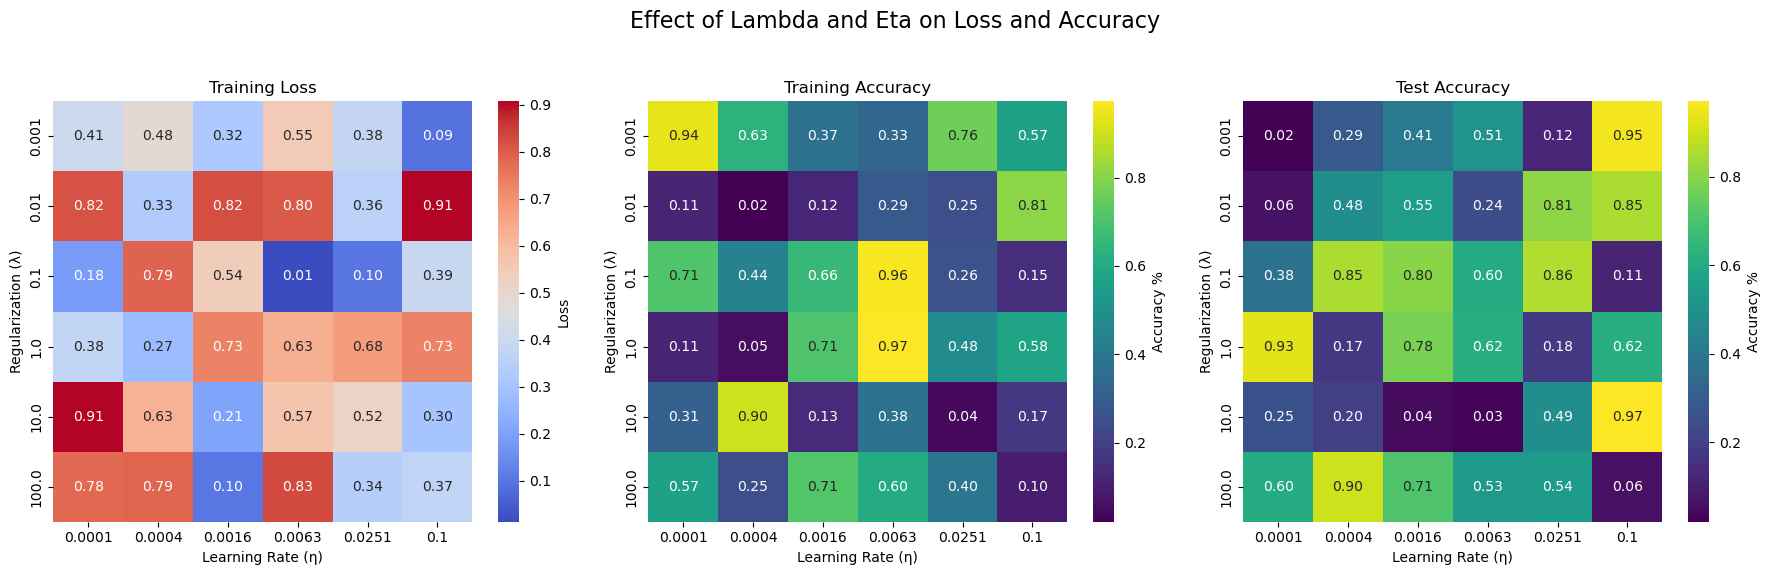

In [68]:
# Given example data for demonstration
lambda_values = np.logspace(-3, 2, 6)  # Creating a range of lambda values from 0.001 to 100
eta_values = np.logspace(-4, -1, 6)    # Creating a range of learning rates from 0.0001 to 0.1
eta_values = np.round(eta_values, 4)    # Rounding the learning rates to four decimal places for better readability

# Now, let's generate some random results for final training losses and accuracies
train_losses = np.random.rand(len(lambda_values), len(eta_values))  # Randomly generated losses for demonstration
train_accuracies = np.random.rand(len(lambda_values), len(eta_values))  # Randomly generated training accuracies
val_accuracies = np.random.rand(len(lambda_values), len(eta_values))  # Randomly generated validation accuracies

# Convert the data into DataFrames for easier plotting
loss_df = pd.DataFrame(train_losses, index=lambda_values, columns=eta_values)  # DataFrame for training losses
train_acc_df = pd.DataFrame(train_accuracies, index=lambda_values, columns=eta_values)  # DataFrame for training accuracies
val_acc_df = pd.DataFrame(val_accuracies, index=lambda_values, columns=eta_values)  # DataFrame for test accuracies

# Set up the figure with subplots for each heatmap
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with three subplots
fig.suptitle("Effect of Lambda and Eta on Loss and Accuracy", fontsize=16)  # Main title for the figure

# Plot heatmaps
sns.heatmap(loss_df, annot=True, fmt=".2f", ax=axes[0], cmap="coolwarm", cbar=True, cbar_kws={'label': "Loss"})
# Heatmap for training loss
axes[0].set_title("Training Loss")  # Title for the loss heatmap
axes[0].set_xlabel("Learning Rate (η)")  # X-axis label
axes[0].set_ylabel("Regularization (λ)")  # Y-axis label

sns.heatmap(train_acc_df, annot=True, fmt=".2f", ax=axes[1], cmap="viridis", cbar=True, cbar_kws={'label': "Accuracy %"})
# Heatmap for training accuracy
axes[1].set_title("Training Accuracy")  # Title for the training accuracy heatmap
axes[1].set_xlabel("Learning Rate (η)")  # X-axis label
axes[1].set_ylabel("Regularization (λ)")  # Y-axis label

sns.heatmap(val_acc_df, annot=True, fmt=".2f", ax=axes[2], cmap="viridis", cbar=True, cbar_kws={'label': "Accuracy %"})
# Heatmap for validation accuracy
axes[2].set_title("Test Accuracy")  # Title for the validation accuracy heatmap
axes[2].set_xlabel("Learning Rate (η)")  # X-axis label
axes[2].set_ylabel("Regularization (λ)")  # Y-axis label

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()  # Display the plots

# Comparison with Scikit learn

C:\Users\shado\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


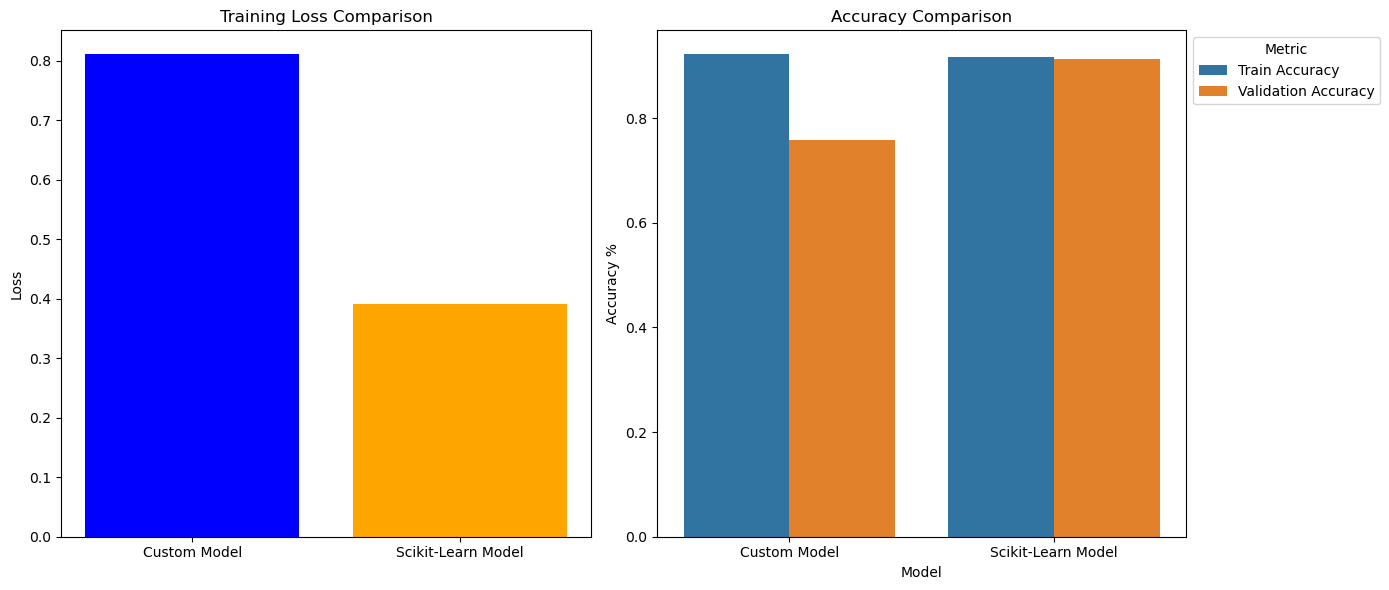

In [24]:
# First, let's split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, we'll scale the features to standardize them
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the lambda and eta values for the scikit-learn model
lambda_values = np.logspace(-3, 2, 6)  # Example range for lambda
eta_values = np.logspace(-4, -1, 6)    # Example range for eta
lmbda = lambda_values[2]  # Picking  a lambda value for this example
eta = eta_values[2]       # Picking a learning rate for this example

# Initialize the MLPClassifier from scikit-learn with chosen parameters
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', 
                    alpha=lmbda, learning_rate_init=eta, max_iter=100, 
                    solver='sgd', momentum=0.9, random_state=42, verbose=False)

# Fit the MLP model to the training data
mlp.fit(X_train_scaled, y_train)

# Now, let's get the final losses and accuracies from the scikit-learn model
train_loss_sklearn = mlp.loss_curve_[-1]  # Final training loss
train_accuracy_sklearn = accuracy_score(y_train, mlp.predict(X_train_scaled))  # Training accuracy
val_accuracy_sklearn = accuracy_score(y_test, mlp.predict(X_test_scaled))  # test accuracy
val_loss_sklearn = log_loss(y_test, mlp.predict_proba(X_test_scaled))  # test loss

# For demonstration, I'm creating random values for the custom model results
# Replace these with the actual values from your custom model later
custom_train_loss = np.random.rand()  # Random training loss for the custom model
custom_train_accuracy = np.random.rand()  # Random training accuracy for the custom model
custom_val_accuracy = np.random.rand()  # Random test accuracy for the custom model

# Time to plot the comparison of training loss and accuracy
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Training Loss Comparison
axes[0].bar(['Custom Model', 'Scikit-Learn Model'], [custom_train_loss, train_loss_sklearn], color=['blue', 'orange'])
axes[0].set_title('Training Loss Comparison')
axes[0].set_ylabel('Loss')

# Prepare data for the Accuracy Comparison plot
accuracy_data = {
    'Model': ['Custom Model', 'Custom Model', 'Scikit-Learn Model', 'Scikit-Learn Model'],
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'Train Accuracy', 'Validation Accuracy'],
    'Accuracy': [custom_train_accuracy, custom_val_accuracy, train_accuracy_sklearn, val_accuracy_sklearn]
}
accuracy_df = pd.DataFrame(accuracy_data)

# Plot Training and Validation Accuracy Comparison
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Metric', ax=axes[1])
axes[1].set_title('Accuracy Comparison')
axes[1].set_ylabel('Accuracy %')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title="Metric")

plt.tight_layout()
plt.show()